# Etude de nbr ennfant

Ce notebook a pour but d'étudier l'importance de la variable enfant sur le dataset sur la variable targuet : charges

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# formatage dataset

In [2]:

df = pd.read_csv("data/medical_insurance.csv", sep=",")
le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

oh_region = OneHotEncoder()
region_encoded = oh_region.fit_transform(df["region"].values.reshape(-1, 1)).toarray()
df_region_encoded = pd.DataFrame(region_encoded, columns=["northeast", "northwest", "southeast", "southwest"])
df = pd.concat([df, df_region_encoded], axis=1)
df.drop("region", axis=1, inplace=True)

In [3]:
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.5)
q3 = df["charges"].quantile(0.75)

df["charges_cat"] = df["charges"].apply(lambda x: 1 if x < q1 else 2 if x < q2 else 3 if x < q3 else 4)


In [4]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,charges_cat
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0,4
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0,1
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0,1
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0,4
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0,1


In [7]:
df["children"].value_counts()


children
0    1186
1     672
2     496
3     324
4      52
5      42
Name: count, dtype: int64

<Axes: xlabel='children', ylabel='charges'>

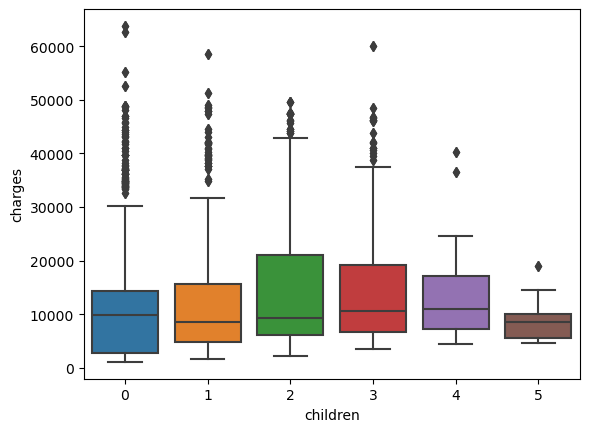

In [13]:
# Distribution des charges en fonction de children
sns.boxplot(x="children", y="charges", data=df)

<Axes: xlabel='children'>

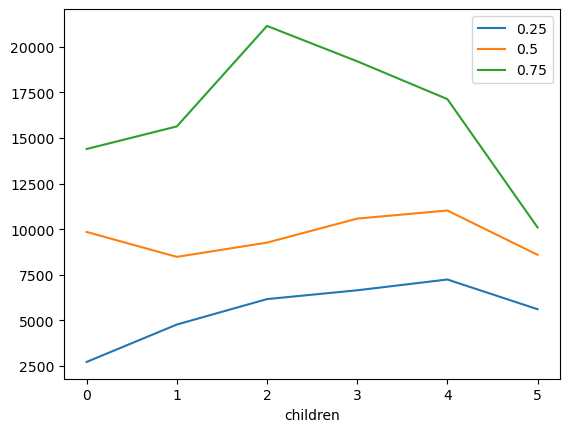

In [25]:
# plot evolution des quartiles des charges en fonction de children

df.groupby("children")["charges"].quantile([0.25, 0.5, 0.75]).unstack().plot()


c'est bizarre => ?
comment l'interpreter

In [21]:
le_sex.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

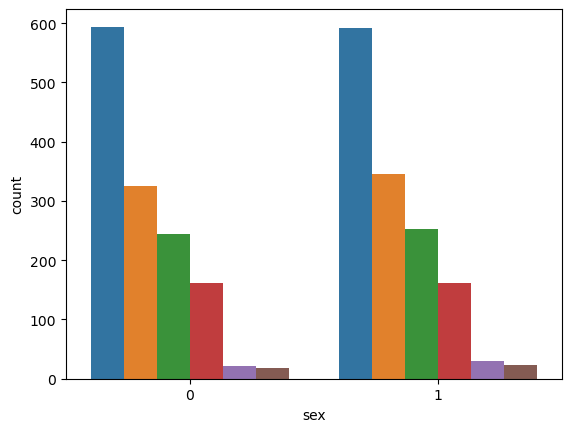

In [26]:
# division homme/femme "sex" 0 = femme, 1 = homme
# plot nombre d'enfant en fct du sexe

sns.countplot(x="sex", hue="children", data=df)



<Axes: xlabel='children', ylabel='charges'>

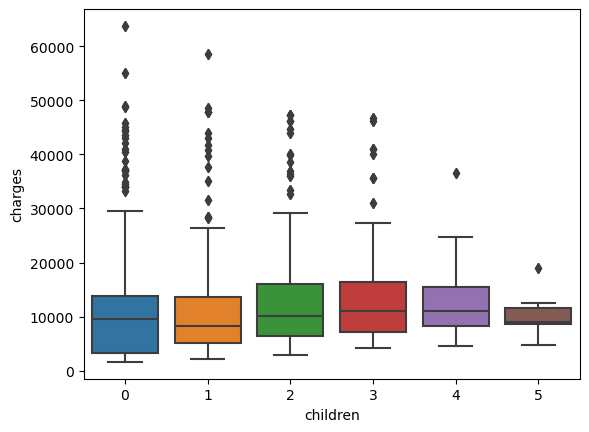

In [19]:
# charges selon sexe nombre d'enfant
# new df

df_charge_femme = df[df["sex"] == 0]
df_charge_hom = df[df["sex"] == 1]

sns.boxplot(x="children", y="charges", data=df_charge_femme)

<Axes: xlabel='children', ylabel='charges'>

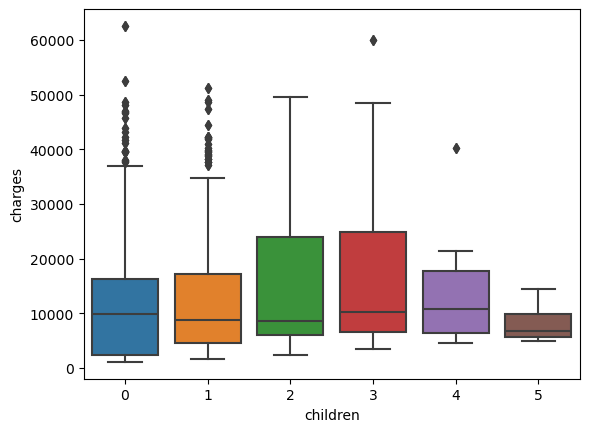

In [20]:
sns.boxplot(x="children", y="charges", data=df_charge_hom)

 -  homme plus cher que femme ?
 -  si oui quel impact a la varibale enfant sur cette ecart

<Axes: xlabel='sex', ylabel='charges'>

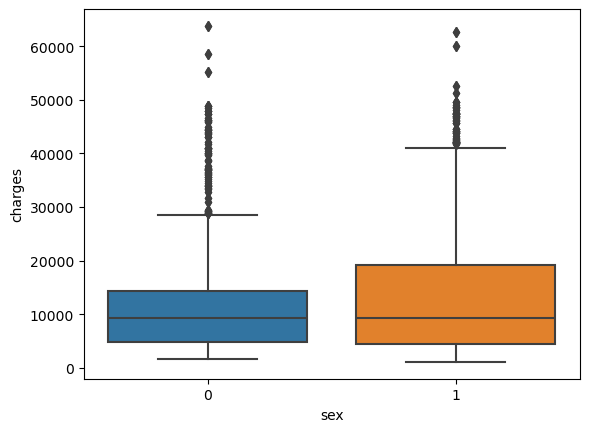

In [24]:
# homme plus cher que femme ?
sns.boxplot(x="sex", y="charges", data=df)

- homme plus cher que femme ?

- je sais pas si on peut parfaitement l'affirmer